In [1]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
print(x_train[0].shape)

(28, 28)


In [17]:
import random
random.state = 21

10083

In [0]:
x_seq = []
y_seq = []
#генерируем последовательности и ответы на сумму первых двух чисел для трейна
for i in range(60000):
  x_sub, y_sub = zip(*random.sample(list(zip(x_train, y_train)), 10))
  x_seq.append(np.array(x_sub))
  y_seq.append(sum(y_sub[:2]))

In [0]:
x_seq_test = []
y_seq_test = []
#генерируем последовательности и ответы на сумму первых двух чисел для теста
for i in range(10000):
  x_sub_test, y_sub_test = zip(*random.sample(list(zip(x_test, y_test)), 10))
  x_seq_test.append(np.array(x_sub_test))
  y_seq_test.append(sum(y_sub_test[:2]))

In [0]:
x_seq = np.array(x_seq)
y_seq = np.array(y_seq)
x_seq_test = np.array(x_seq_test)
y_seq_test = np.array(y_seq_test)

In [69]:
x_seq[0][0].shape

(784,)

In [52]:
x_seq_test.shape

(10000, 10, 28, 28)

In [53]:
x_seq = x_seq.reshape(60000, 10, 28*28)
x_seq_test = x_seq_test.reshape(10000,10,28*28)
x_seq.shape

(60000, 10, 784)

Проверим, что все окей:

Sum of 1st and 2nd numbers is 13


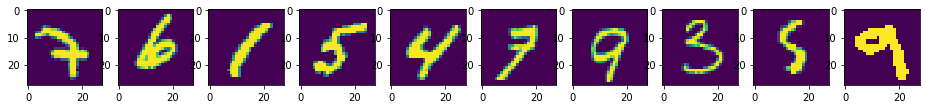

In [94]:
fig=plt.figure(figsize=(16, 16))
columns = 10
rows = 1
n=random.randint(0, 60000)
print ('Sum of 1st and 2nd numbers is', y_seq[n])
for i in range(1,11):
    image = x_seq.reshape(60000, 10, 28,28)[n][i-1]
    image = np.array(image, dtype='float')
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()

In [0]:
model = Sequential()
#на вход подаю 10,10, 784 (28*28) потому, что в этом слое вроде никак нельзя запихнуть 28*28, возможно с Conv2dLstm можно, 
#но в чатике написали, что за это баллы снижать не будут, так что оставил так.
model.add(LSTM(128, batch_input_shape=(10,10,784), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='softmax'))

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (10, 10, 128)             467456    
_________________________________________________________________
dropout_12 (Dropout)         (10, 10, 128)             0         
_________________________________________________________________
lstm_12 (LSTM)               (10, 128)                 131584    
_________________________________________________________________
dropout_13 (Dropout)         (10, 128)                 0         
_________________________________________________________________
dense_8 (Dense)              (10, 32)                  4128      
_________________________________________________________________
dropout_14 (Dropout)         (10, 32)                  0         
_________________________________________________________________
dense_9 (Dense)              (10, 19)                 

In [0]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [67]:
model.fit(x_seq, y_seq, epochs=3, validation_data=(x_seq_test, y_seq_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 227s 4ms/sample - loss: 2.1998 - acc: 0.2212 - val_loss: 1.4235 - val_acc: 0.5041
Epoch 2/3
60000/60000 [==============================] - 219s 4ms/sample - loss: 1.0665 - acc: 0.6709 - val_loss: 0.5777 - val_acc: 0.8584
Epoch 3/3
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.6128 - acc: 0.8458 - val_loss: 0.4783 - val_acc: 0.8924


После первых трех эпох точность на тесте 0.89, но модель явно недообучена, потому что на трейне точность меньше, попробуем обучить еще

In [68]:
model.fit(x_seq, y_seq, epochs=6, validation_data=(x_seq_test, y_seq_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.4704 - acc: 0.8854 - val_loss: 0.4036 - val_acc: 0.9122
Epoch 2/6
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.3834 - acc: 0.9078 - val_loss: 0.3928 - val_acc: 0.9120
Epoch 3/6
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.3358 - acc: 0.9215 - val_loss: 0.3751 - val_acc: 0.9220
Epoch 4/6
60000/60000 [==============================] - 220s 4ms/sample - loss: 0.3010 - acc: 0.9292 - val_loss: 0.3803 - val_acc: 0.9198
Epoch 5/6
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.2630 - acc: 0.9381 - val_loss: 0.3859 - val_acc: 0.9203
Epoch 6/6
60000/60000 [==============================] - 218s 4ms/sample - loss: 0.2254 - acc: 0.9456 - val_loss: 0.3830 - val_acc: 0.9277


После 9 эпох точность более менее стабилизировалась на отметке 0.93 (округлим =) ), можно еще потренировать 3-4 эпохи, но большого прироста это не даст. Для увеличения точности нужно менять архитектуру нейросети или изменять параметры слоев/обучения.

Проверим модельку:

In [0]:
pred = model.predict(x_seq_test)

True sum of 1st and 2nd numbers is 7
Predicted sum of 1st and 2nd numbers is 7


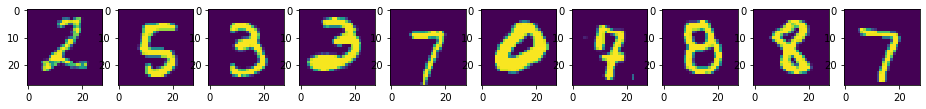

In [118]:
fig=plt.figure(figsize=(16, 16))
columns = 10
rows = 1
n=random.randint(0, 10000)
print ('True sum of 1st and 2nd numbers is', y_seq_test[n])
print ('Predicted sum of 1st and 2nd numbers is', np.argmax(pred[n]))
for i in range(1,11):
    image = x_seq_test.reshape(10000, 10, 28,28)[n][i-1]
    image = np.array(image, dtype='float')
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()